In [2]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            # Liczymy odległość euklidesową
            differences = self.X_train - x
            distances = np.sqrt(np.sum(differences**2, axis=1))
            # Znajdujemy k najbliższych sąsiadów
            sorted_indices = np.argsort(distances)
            k_indices = sorted_indices[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            # Najczęściej występująca etykieta
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        return predictions

Najlepsza wartość k to 4. Dokładność: 0.8047


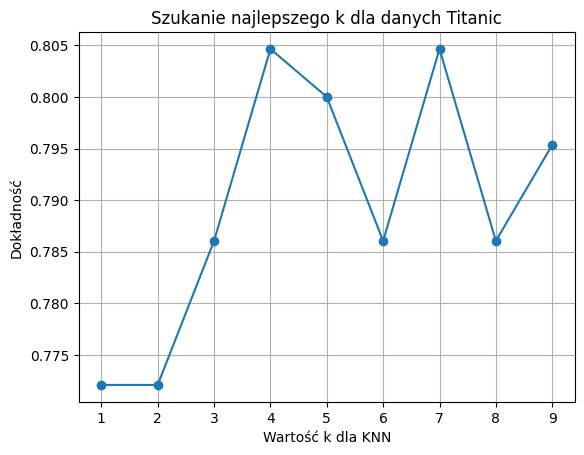

    Predicted
0           0
1           1
2           1
3           1
4           0
5           1
6           1
7           0
8           1
9           1
10          1
11          1
12          0
13          0
14          1
15          0
16          0
17          1
18          0
19          1
Dokładność modelu: 80.47%


In [3]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].dropna()

label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

X = data.drop('Survived', axis=1)
y = data['Survived']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k_values = range(1, 10)
k_scores = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    k_scores.append(accuracy)

best_k = k_values[np.argmax(k_scores)]
best_score = max(k_scores)

print(f"Najlepsza wartość k to {best_k}. Dokładność: {best_score:.4f}")

plt.plot(k_values, k_scores, marker='o')
plt.xlabel('Wartość k dla KNN')
plt.ylabel('Dokładność')
plt.title('Szukanie najlepszego k dla danych Titanic')
plt.grid()
plt.show()

knn = KNN(k=best_k)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

results = pd.DataFrame({
    'Predicted': predictions,
})
print(results.head(20))

accuracy = accuracy_score(y_test, predictions)
print(f"Dokładność modelu: {accuracy * 100:.2f}%")


Najlepsza wartość k to 3. Dokładność: 0.7902


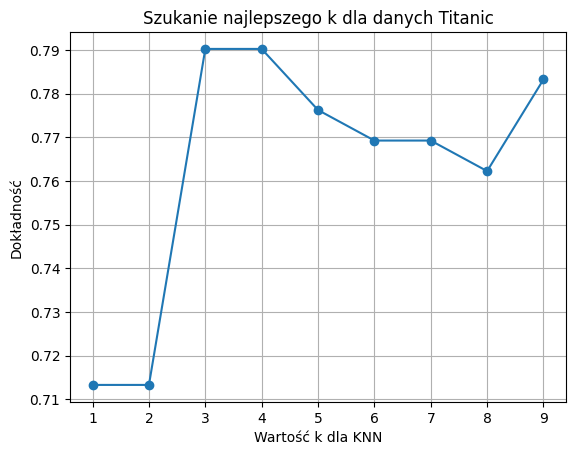

    Predicted
0           1
1           1
2           1
3           0
4           0
5           0
6           0
7           0
8           1
9           0
10          1
11          0
12          1
13          0
14          1
15          1
16          0
17          0
18          0
19          0
Dokładność modelu: 79.02%


In [4]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].dropna()

label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

X = data.drop('Survived', axis=1)
y = data['Survived']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=132)

k_values = range(1, 10)
k_scores = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    k_scores.append(accuracy)

best_k = k_values[np.argmax(k_scores)]
best_score = max(k_scores)

print(f"Najlepsza wartość k to {best_k}. Dokładność: {best_score:.4f}")

plt.plot(k_values, k_scores, marker='o')
plt.xlabel('Wartość k dla KNN')
plt.ylabel('Dokładność')
plt.title('Szukanie najlepszego k dla danych Titanic')
plt.grid()
plt.show()

knn = KNN(k=best_k)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

results = pd.DataFrame({
    'Predicted': predictions,
})
print(results.head(20))

accuracy = accuracy_score(y_test, predictions)
print(f"Dokładność modelu: {accuracy * 100:.2f}%")


Dokładność wbudowanego KNN: 0.7902097902097902


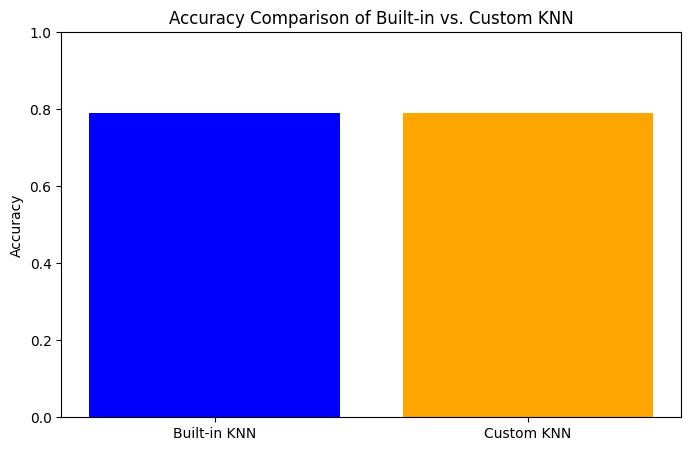

In [5]:
from sklearn.neighbors import KNeighborsClassifier

k = best_k
knn_builtin = KNeighborsClassifier(n_neighbors=k)
knn_builtin.fit(X_train, y_train)
predictions_builtin = knn_builtin.predict(X_test)
builtin_accuracy = accuracy_score(y_test, predictions_builtin)
print("Dokładność wbudowanego KNN:", builtin_accuracy)

labels = ['Built-in KNN', 'Custom KNN']
accuracy_values = [builtin_accuracy, accuracy]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracy_values, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Accuracy Comparison of Built-in vs. Custom KNN')
plt.show()

In [4]:
pip install python-mnist


In [5]:
from mnist import MNIST

Najlepsza wartość k to 4. Dokładność: 0.8667


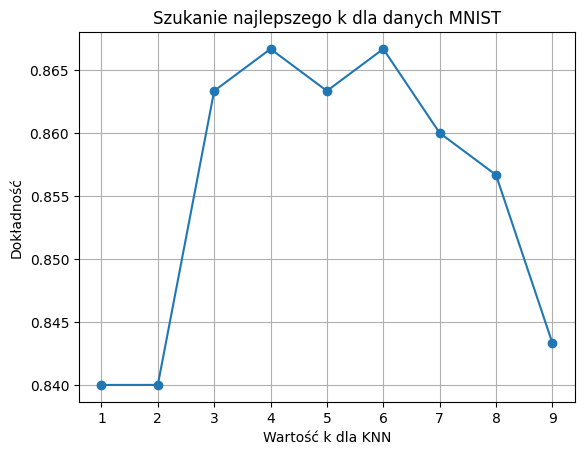

[7, 2, 1, 0, 4, 1, 9, 9, 9, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 1, 5, 5, 1, 2, 4, 4, 6, 3, 5, 5, 0, 0, 4, 1, 9, 1, 7, 8, 4, 9, 7, 4, 0, 4, 3, 0, 7, 0, 0, 7, 1, 7, 3, 2, 9, 7, 9, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 9, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 1, 3, 9, 7, 9, 4, 4, 9, 7, 5, 4, 7, 6, 9, 4, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 1, 9, 9, 5, 5, 1, 5, 6, 0, 3, 1, 4, 6, 5, 4, 6, 5, 4, 5, 1, 9, 4, 7, 2, 3, 2, 1, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 1, 1, 6, 9, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 9, 9, 3, 9, 0, 3, 5, 5, 3, 7, 3, 2, 7, 1, 2, 8, 4, 1, 7, 5, 3, 8, 7, 7, 9, 2, 1, 4, 1, 5, 9, 8, 7, 1, 5, 0, 6, 4, 2, 9, 1, 9, 5, 7, 7, 2, 6, 2, 6, 8, 1, 7, 7, 4, 1, 0, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8]
Dokładność modelu: 86.67%


In [58]:
# Wczytajnie danych MNIST
mndata = MNIST()
X_train, y_train = mndata.load_training()
X_test, y_test = mndata.load_testing()

# Przekształcamy dane na macierze NumPy
X_train = np.array(X_train)[:1200]
y_train = np.array(y_train)[:1200]
X_test = np.array(X_test)[:300]
y_test = np.array(y_test)[:300]


k_values = range(1, 10)
k_scores = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    k_scores.append(accuracy)

# Znalezienie najlepszego k
best_k = k_values[np.argmax(k_scores)]
best_score = max(k_scores)

print(f"Najlepsza wartość k to {best_k}. Dokładność: {best_score:.4f}")

# Rysowanie wykresu dokładności dla różnych wartości k
plt.plot(k_values, k_scores, marker='o')
plt.xlabel('Wartość k dla KNN')
plt.ylabel('Dokładność')
plt.title('Szukanie najlepszego k dla danych MNIST')
plt.grid()
plt.show()

knn = KNN(k=best_k)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

#Wyniki
print(predictions)
accuracy = accuracy_score(y_test, predictions)
print(f"Dokładność modelu: {accuracy * 100:.2f}%")

Najlepsza wartość k to 4. Dokładność: 0.9067


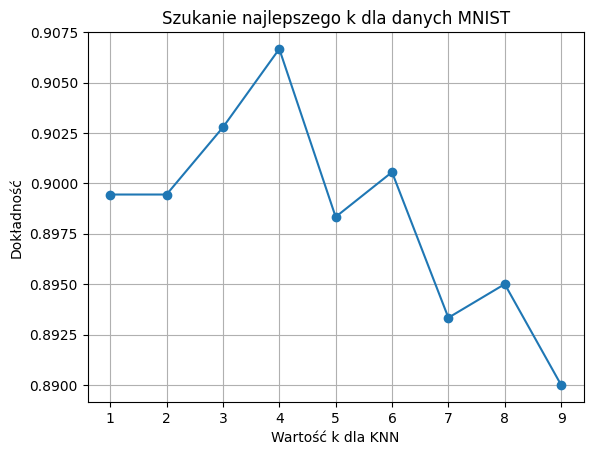

[7, 2, 1, 0, 9, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 1, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 7, 9, 7, 9, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 1, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 1, 1, 8, 1, 8, 1, 8, 5, 0, 3, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 1, 1, 6, 4, 3, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 9, 9, 7, 2, 2, 0, 6, 4, 2, 9, 1, 9, 5, 7, 7, 2, 6, 2, 6, 8, 5, 7, 7, 4, 1, 0, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 9, 2, 9, 2, 0, 4, 0, 0, 2, 8, 1, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 0, 5, 7, 7, 9, 3, 6, 4, 6, 0, 7, 1, 1, 2, 1, 

In [80]:
# Wczytajnie danych MNIST
mndata = MNIST()
X_train, y_train = mndata.load_training()
X_test, y_test = mndata.load_testing()

# Przekształcamy dane na macierze NumPy
X_train = np.array(X_train)[:4200]
y_train = np.array(y_train)[:4200]
X_test = np.array(X_test)[:1800]
y_test = np.array(y_test)[:1800]


k_values = range(1, 10)
k_scores = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    k_scores.append(accuracy)

# Znalezienie najlepszego k
best_k = k_values[np.argmax(k_scores)]
best_score = max(k_scores)

print(f"Najlepsza wartość k to {best_k}. Dokładność: {best_score:.4f}")

# Rysowanie wykresu dokładności dla różnych wartości k
plt.plot(k_values, k_scores, marker='o')
plt.xlabel('Wartość k dla KNN')
plt.ylabel('Dokładność')
plt.title('Szukanie najlepszego k dla danych MNIST')
plt.grid()
plt.show()

knn = KNN(k=best_k)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

#Wyniki
print(predictions)
accuracy = accuracy_score(y_test, predictions)
print(f"Dokładność modelu: {accuracy * 100:.2f}%")

In [81]:
from sklearn.neighbors import KNeighborsClassifier

from mnist import MNIST
from sklearn.model_selection import train_test_split

# Załaduj dane MNIST
mndata = MNIST()
images, labels = mndata.load_training()  # Załaduj zestaw treningowy MNIST

# Podziel dane na zbiory treningowy i testowy (30% testowy, 70% treningowy)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

k = 4
knn_builtin = KNeighborsClassifier(n_neighbors=k)
knn_builtin.fit(X_train, y_train)
predictions_builtin = knn_builtin.predict(X_test)
builtin_accuracy = accuracy_score(y_test, predictions_builtin)
print("Dokładność wbudowanego KNN:", builtin_accuracy)

Dokładność wbudowanego KNN: 0.9688333333333333


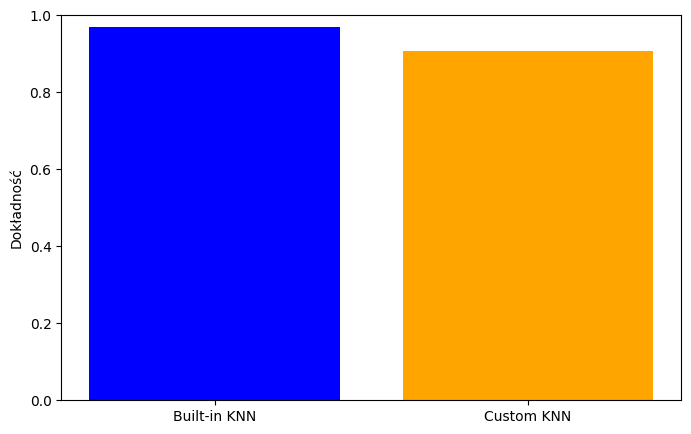

In [82]:
#porównanie dwóch modelów
labels = ['Built-in KNN', 'Custom KNN']
accuracy_values = [builtin_accuracy, accuracy]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracy_values, color=['blue', 'orange'])
plt.ylabel('Dokładność')
plt.ylim(0, 1)
plt.title('')
plt.show()